# AgriData Explorer: Understanding Indian agriculture with EDA

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
df = pd.read_csv("ICRISAT-District Level Data.csv")
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


## DATA CLEANING

In [4]:
# View dimensions of dataset
df.shape

(16146, 80)

In [5]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [6]:
# Check for missing values
print(df.isnull().sum())

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64


In [7]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# To list all column name
df.columns.tolist()

['Dist Code',
 'Year',
 'State Code',
 'State Name',
 'Dist Name',
 'RICE AREA (1000 ha)',
 'RICE PRODUCTION (1000 tons)',
 'RICE YIELD (Kg per ha)',
 'WHEAT AREA (1000 ha)',
 'WHEAT PRODUCTION (1000 tons)',
 'WHEAT YIELD (Kg per ha)',
 'KHARIF SORGHUM AREA (1000 ha)',
 'KHARIF SORGHUM PRODUCTION (1000 tons)',
 'KHARIF SORGHUM YIELD (Kg per ha)',
 'RABI SORGHUM AREA (1000 ha)',
 'RABI SORGHUM PRODUCTION (1000 tons)',
 'RABI SORGHUM YIELD (Kg per ha)',
 'SORGHUM AREA (1000 ha)',
 'SORGHUM PRODUCTION (1000 tons)',
 'SORGHUM YIELD (Kg per ha)',
 'PEARL MILLET AREA (1000 ha)',
 'PEARL MILLET PRODUCTION (1000 tons)',
 'PEARL MILLET YIELD (Kg per ha)',
 'MAIZE AREA (1000 ha)',
 'MAIZE PRODUCTION (1000 tons)',
 'MAIZE YIELD (Kg per ha)',
 'FINGER MILLET AREA (1000 ha)',
 'FINGER MILLET PRODUCTION (1000 tons)',
 'FINGER MILLET YIELD (Kg per ha)',
 'BARLEY AREA (1000 ha)',
 'BARLEY PRODUCTION (1000 tons)',
 'BARLEY YIELD (Kg per ha)',
 'CHICKPEA AREA (1000 ha)',
 'CHICKPEA PRODUCTION (1000 tons

In [9]:
# importing re (Regular Expression)
import re

# Cleaning column names
def cleaning_column(col):
    col = col.strip()  
    col = col.lower()  
    col = re.sub(r"\(.*?\)", "", col)  
    col = col.replace(" ", "_")  
    col = re.sub(r"[^a-z0-9_]", "", col)  
    return col.rstrip('_')

# Apply the cleaning function
df.columns = [cleaning_column(col) for col in df.columns]

# Show result
print(df.columns)

Index(['dist_code', 'year', 'state_code', 'state_name', 'dist_name',
       'rice_area', 'rice_production', 'rice_yield', 'wheat_area',
       'wheat_production', 'wheat_yield', 'kharif_sorghum_area',
       'kharif_sorghum_production', 'kharif_sorghum_yield',
       'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield',
       'sorghum_area', 'sorghum_production', 'sorghum_yield',
       'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield',
       'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area',
       'finger_millet_production', 'finger_millet_yield', 'barley_area',
       'barley_production', 'barley_yield', 'chickpea_area',
       'chickpea_production', 'chickpea_yield', 'pigeonpea_area',
       'pigeonpea_production', 'pigeonpea_yield', 'minor_pulses_area',
       'minor_pulses_production', 'minor_pulses_yield', 'groundnut_area',
       'groundnut_production', 'groundnut_yield', 'sesamum_area',
       'sesamum_production', 'sesa

## DATA ANALYSIS

### Performing Exploratory Data Analysis (EDA)

In [10]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import os
os.makedirs("plots", exist_ok=True)

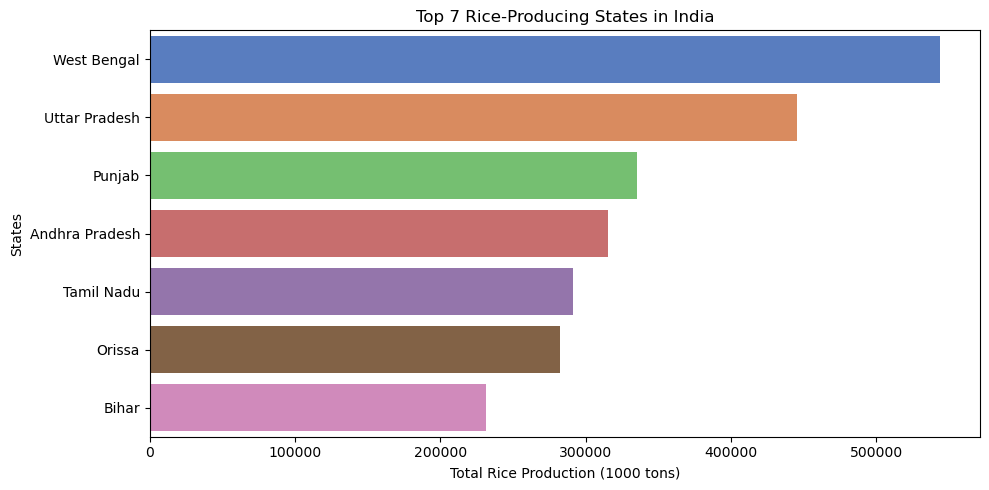

In [12]:
# Top 7 RICE PRODUCTION State Data

top_rice_states = df.groupby('state_name')['rice_production'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rice_states.values, y=top_rice_states.index, palette='muted')
plt.title('Top 7 Rice-Producing States in India')
plt.xlabel('Total Rice Production (1000 tons)')
plt.ylabel('States')
plt.tight_layout()
plt.show()

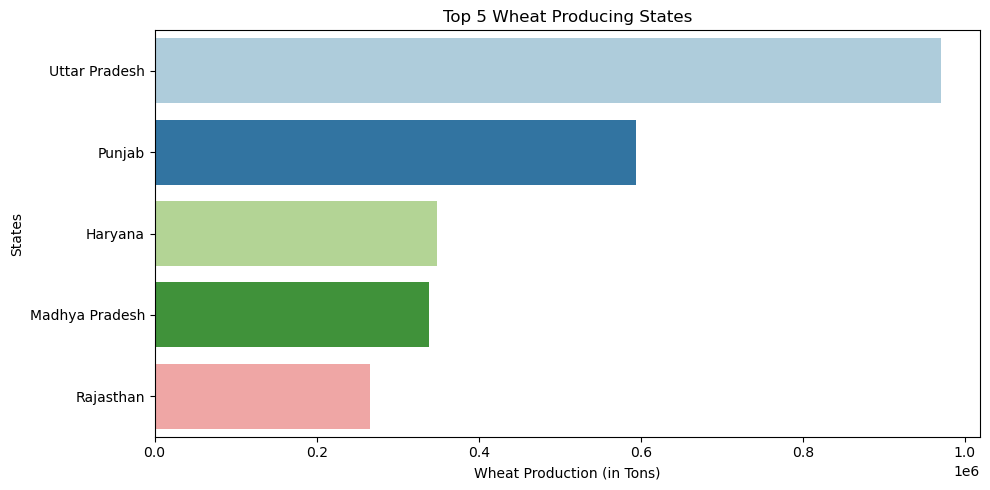

In [13]:
#Top 5 Wheat Producing States Data

top_wheat_states = df.groupby('state_name')['wheat_production'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_wheat_states.values,y=top_wheat_states.index, palette='Paired')
plt.xlabel("Wheat Production (in Tons)")
plt.ylabel("States")
plt.title("Top 5 Wheat Producing States")
plt.tight_layout()
plt.show()

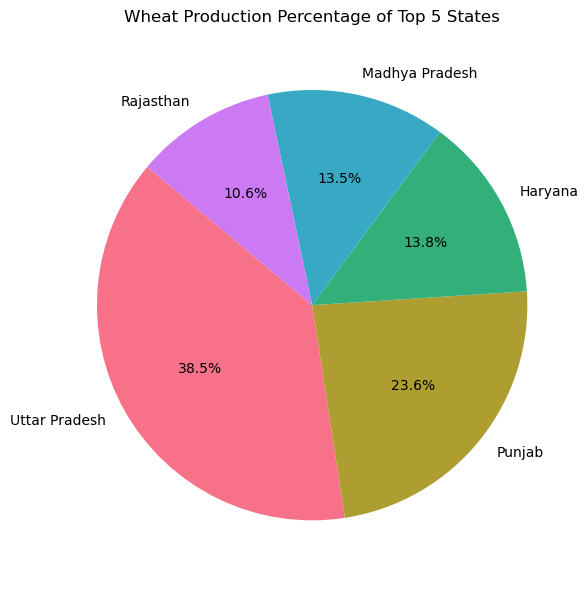

In [14]:
# Top 5 Wheat Producing States Data's percentage(%)

top_wheat_states = df.groupby('state_name')['wheat_production'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_wheat_states.values,labels=top_wheat_states.index,
        autopct='%1.1f%%',  # To show percentage
        startangle=140,
        colors=sns.color_palette('husl', n_colors=5))

plt.title('Wheat Production Percentage of Top 5 States')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()

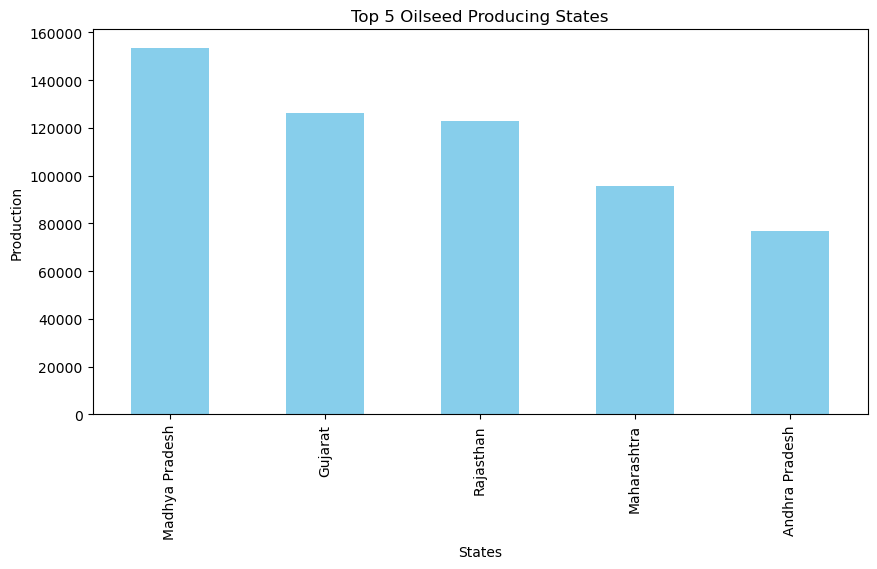

In [15]:
# Oil seed production by top 5 states

top_oilseeds = df.groupby('state_name')['oilseeds_production'].sum().sort_values(ascending=False).head(5)

top_oilseeds.plot(kind='bar',figsize=(10, 5),color='skyblue')
plt.title("Top 5 Oilseed Producing States")
plt.xlabel("States")
plt.ylabel("Production")
plt.show()

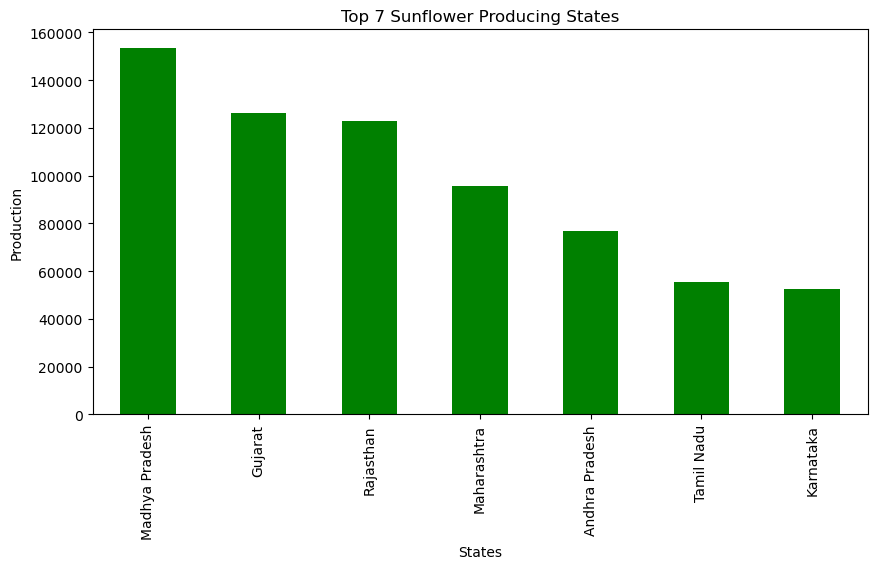

In [16]:
# Top 7 SUNFLOWER PRODUCTION  State

top_sunflower = df.groupby('state_name')['oilseeds_production'].sum().sort_values(ascending=False).head(7)

top_sunflower.plot(kind='bar',figsize=(10, 5), color='green')
plt.title("Top 7 Sunflower Producing States")
plt.xlabel("States")
plt.ylabel("Production")
plt.show()

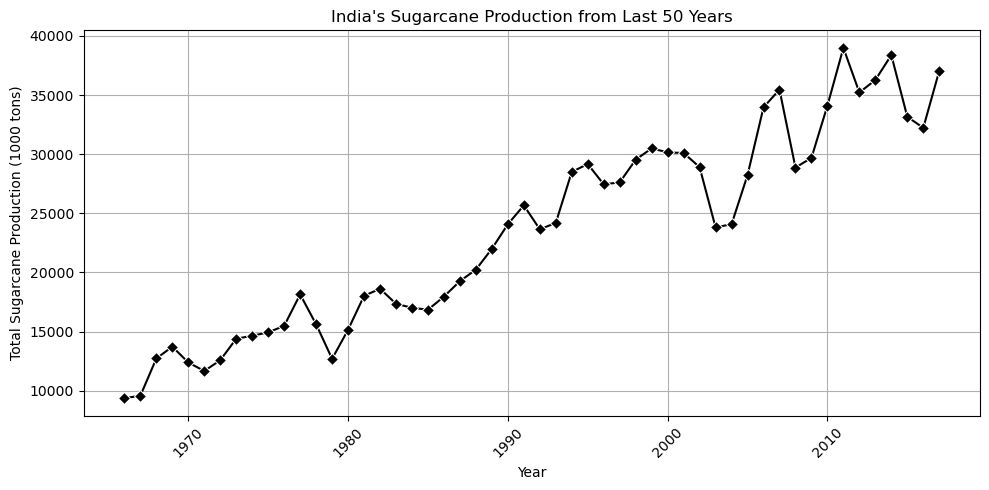

In [17]:
# India's SUGARCANE PRODUCTION From Last 50 Years

sugarcane_trend = df.groupby('year')['sugarcane_production'].sum().reset_index()

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=sugarcane_trend, x='year', y='sugarcane_production', marker='D', color='black')

plt.title("India's Sugarcane Production from Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Total Sugarcane Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

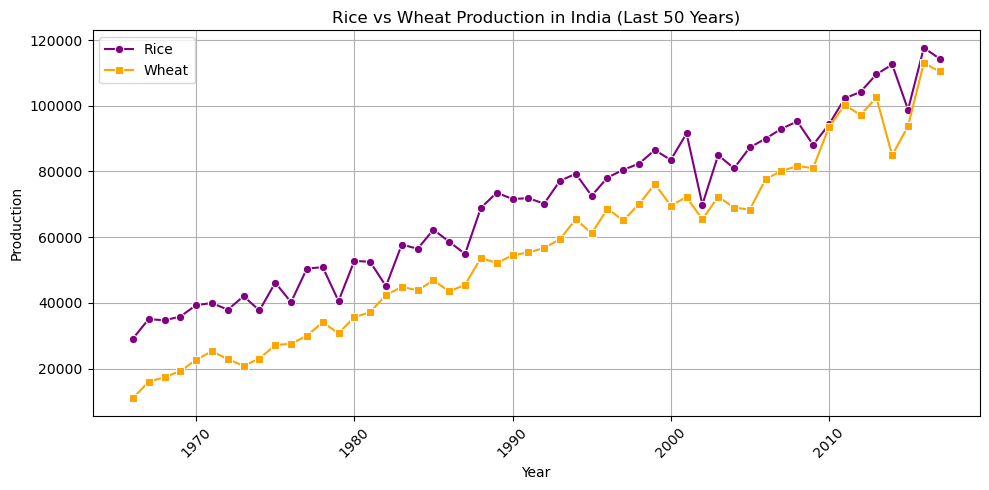

In [18]:
# Rice Production Vs Wheat Production (Last 50y)

# Grouping by year and summing national totals
rice_wheat_trend = df.groupby('year')[['rice_production', 'wheat_production']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=rice_wheat_trend, x='year', y='rice_production', label='Rice', marker='o', color='purple')
sns.lineplot(data=rice_wheat_trend, x='year', y='wheat_production', label='Wheat', marker='s', color='orange')

plt.title('Rice vs Wheat Production in India (Last 50 Years)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

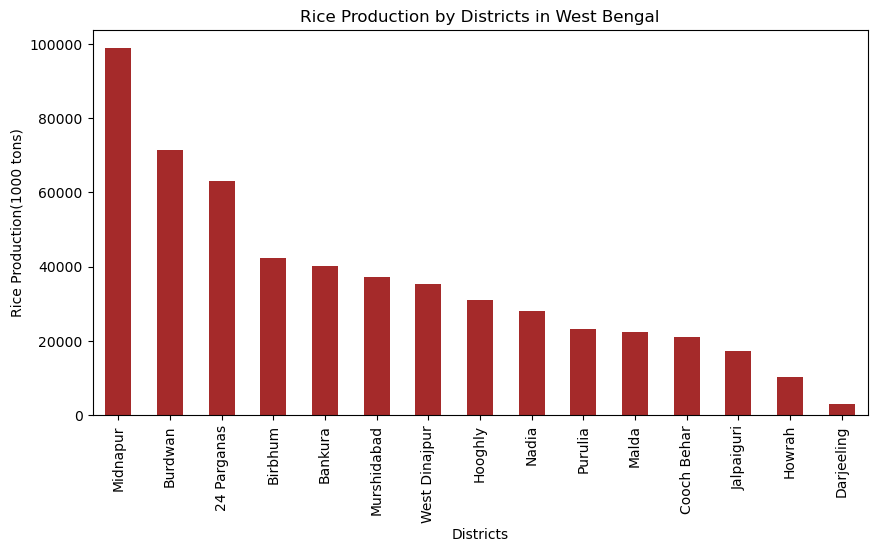

In [19]:
# Rice Production By West Bengal Districts

west_bengal_rice = df[df['state_name'] == 'West Bengal'].groupby('dist_name')['rice_production'].sum().sort_values(ascending=False)

west_bengal_rice.plot(kind='bar', figsize=(10, 5), color='brown')
plt.title("Rice Production by Districts in West Bengal")
plt.xlabel("Districts")
plt.ylabel("Rice Production(1000 tons)")
plt.xticks(rotation=90)
plt.show()
     

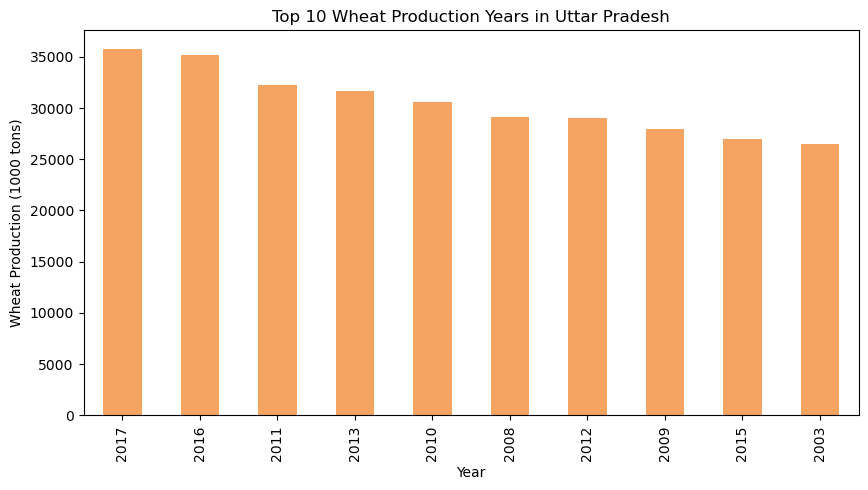

In [20]:
# Top 10 Wheat Production Years From UP

up_wheat = df[df['state_name'] == 'Uttar Pradesh'].groupby('year')['wheat_production'].sum().sort_values(ascending=False).head(10)

up_wheat.plot(kind='bar', figsize=(10, 5),color='sandybrown')
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.show()
     

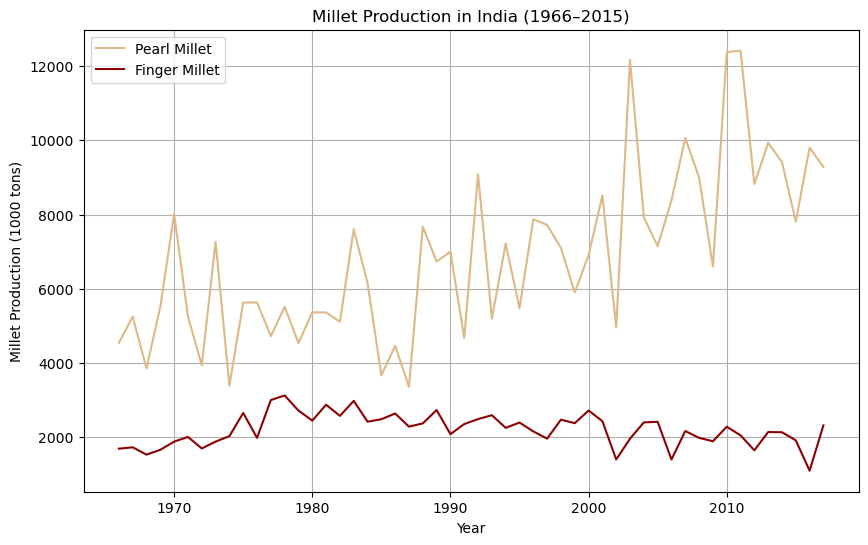

In [21]:
# Millet Production (Last 50y)

millet_cols = ['year', 'pearl_millet_production', 'finger_millet_production']
millet_df = df[millet_cols].groupby('year').sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(millet_df['year'], millet_df['pearl_millet_production'], label='Pearl Millet',color='burlywood')
plt.plot(millet_df['year'], millet_df['finger_millet_production'], label='Finger Millet', color='darkred')
plt.title("Millet Production in India (1966–2015)")
plt.xlabel("Year")
plt.ylabel("Millet Production (1000 tons)")
plt.legend()
plt.grid()
plt.show()

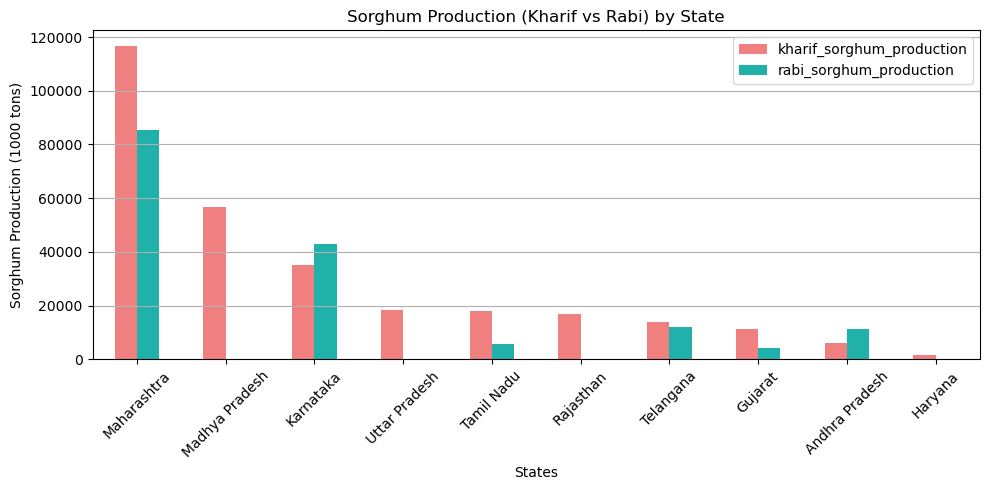

In [22]:
# Sorghum Production (Kharif and Rabi) by Region

sorghum_production = df.groupby('state_name')[['kharif_sorghum_production', 'rabi_sorghum_production']].sum().sort_values(by='kharif_sorghum_production', ascending=False).head(10)

sorghum_production.plot(kind='bar', figsize=(10, 5),color = ['lightcoral' ,'lightseagreen'])
plt.title("Sorghum Production (Kharif vs Rabi) by State")
plt.ylabel("Sorghum Production (1000 tons)")
plt.xlabel("States")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

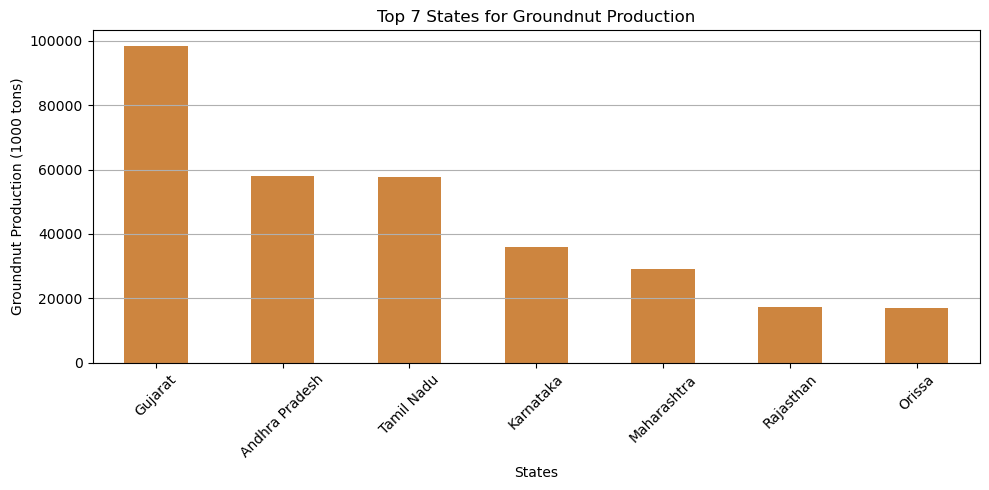

In [23]:
# Top 7 States for Groundnut Production

groundnut_production = df.groupby('state_name')['groundnut_production'].sum().sort_values(ascending=False).head(7)

groundnut_production.plot(kind='bar', color='peru', figsize=(10, 5))
plt.title("Top 7 States for Groundnut Production")
plt.xlabel("States")
plt.ylabel("Groundnut Production (1000 tons)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

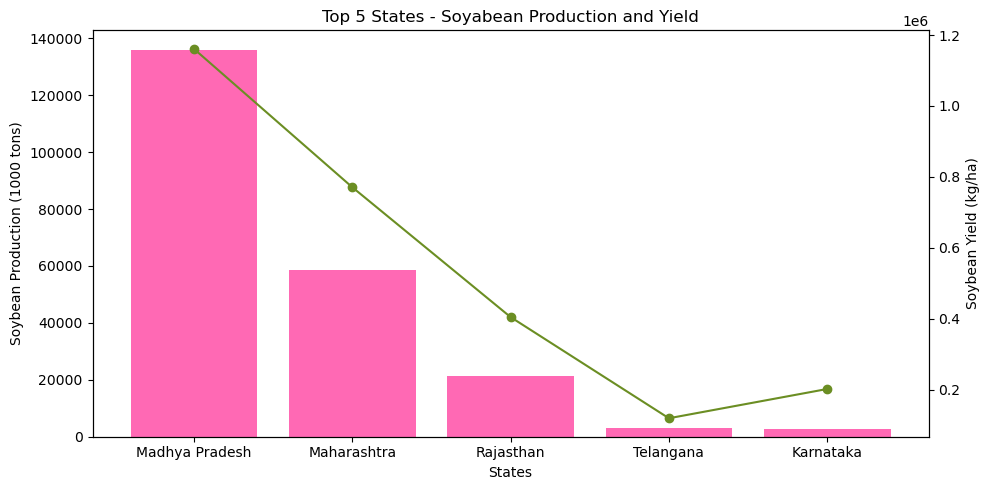

In [24]:
# Soybean Production by Top 5 States and Yield Efficiency

soybean_production = df.groupby('state_name')[['soyabean_production','soyabean_yield']].sum().sort_values(by='soyabean_production', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(soybean_production.index, soybean_production['soyabean_production'], color='hotpink', label='Soybean Production')
ax1.set_ylabel("Soybean Production (1000 tons)")
ax1.set_xlabel("States")

ax2 = ax1.twinx()
ax2.plot(soybean_production.index, soybean_production['soyabean_yield'], color='olivedrab', marker='o', label='Yield Efficiency')
ax2.set_ylabel("Soybean Yield (kg/ha)")

plt.title("Top 5 States - Soyabean Production and Yield")
plt.tight_layout()
plt.show()
     

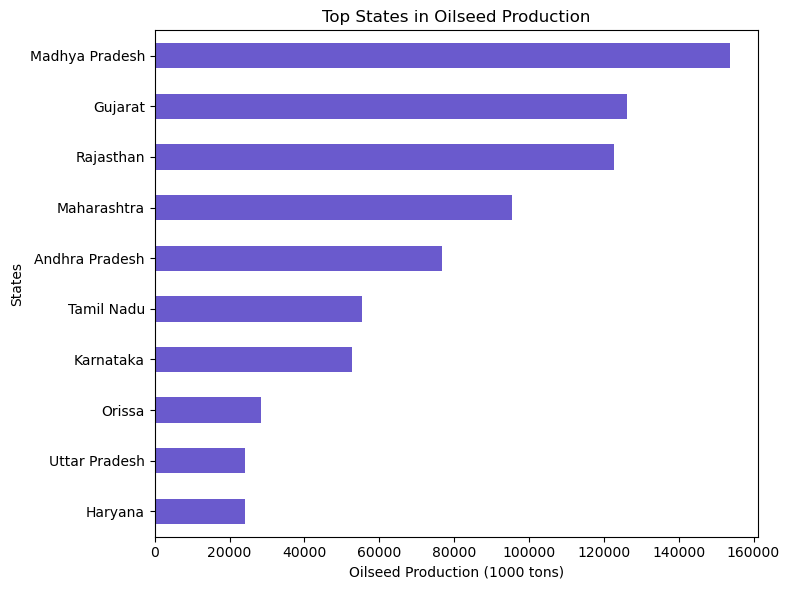

In [25]:
# Oilseed Production in Major States

oilseed = df.groupby('state_name')['oilseeds_production'].sum().sort_values(ascending=False).head(10)

oilseed.plot(kind='barh', color='slateblue', figsize=(8, 6))
plt.title("Top States in Oilseed Production")
plt.xlabel("Oilseed Production (1000 tons)")
plt.ylabel("States")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

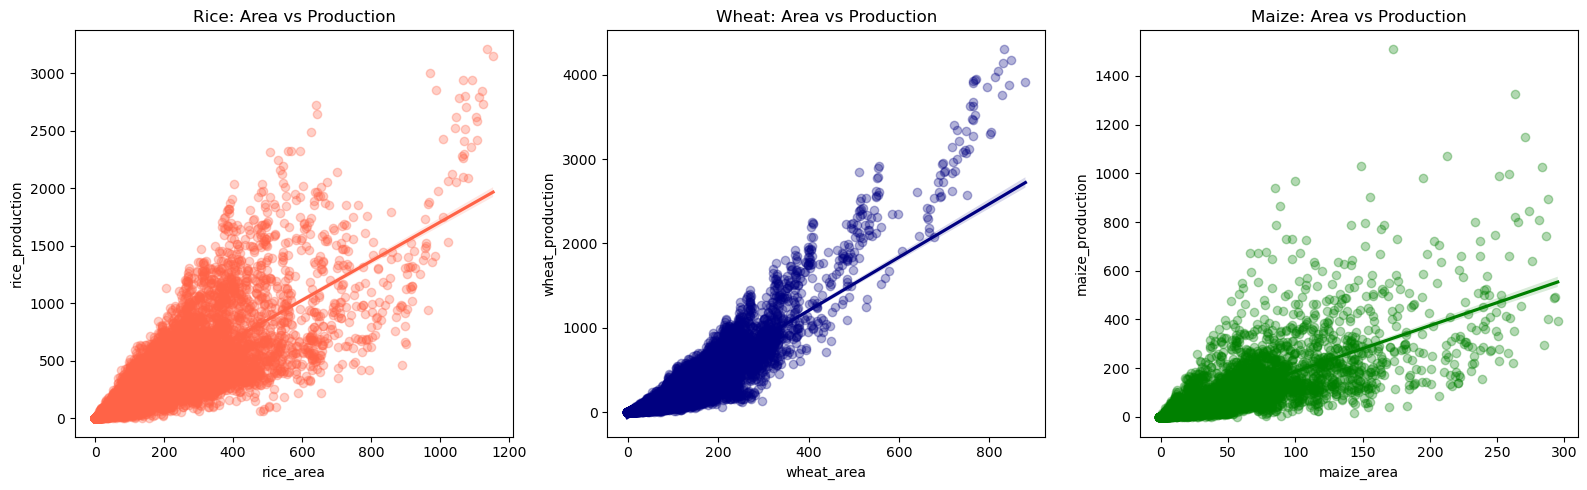

In [26]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.regplot(x='rice_area', y='rice_production', data=df, ax=axes[0], scatter_kws={'alpha':0.3},color='tomato')
axes[0].set_title("Rice: Area vs Production")

sns.regplot(x='wheat_area', y='wheat_production', data=df, ax=axes[1], scatter_kws={'alpha':0.3}, color='navy')
axes[1].set_title("Wheat: Area vs Production")

sns.regplot(x='maize_area', y='maize_production', data=df, ax=axes[2], scatter_kws={'alpha':0.3}, color='green')
axes[2].set_title("Maize: Area vs Production")

plt.tight_layout()
plt.show()
     

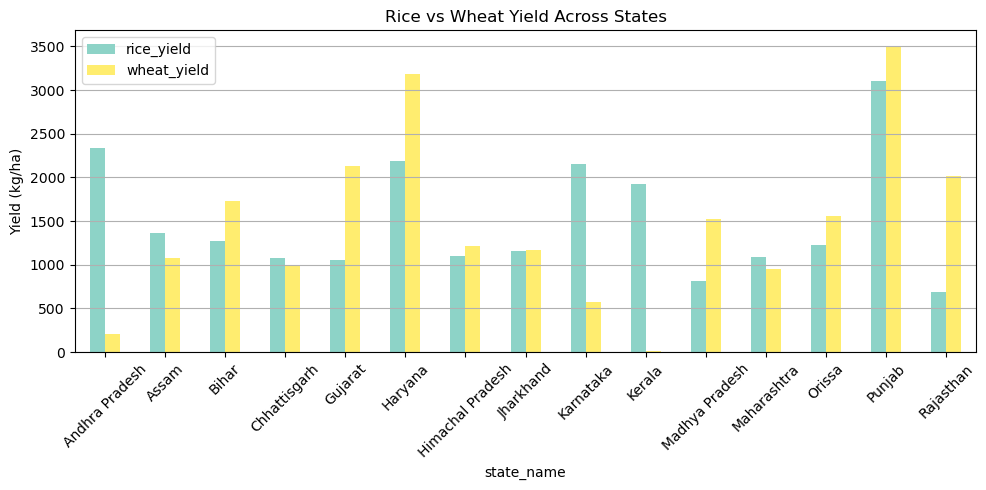

In [27]:
# Rice vs. Wheat Yield Across States

yield_data = df.groupby('state_name')[['rice_yield', 'wheat_yield']].mean().dropna().head(15)

yield_data.plot(kind='bar', figsize=(10, 5), colormap = 'Set3')
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (kg/ha)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
     

## SQL CONNECTION

In [28]:
import pymysql
from datetime import datetime

In [29]:
#SQL Connection
connection = pymysql.connect(host = '127.0.0.1',user='root',passwd='Haripriya@23')
cur = connection.cursor()

In [76]:
#Creating policelog database 
cur.execute("create database AgriData")

In [30]:
#Use database policelog
cur.execute("use AgriData")
connection.commit()

In [78]:
query="""CREATE TABLE IF NOT EXISTS Agri_Data_Expo (
    dist_code INT,
    year INT,
    state_code INT,
    state_name VARCHAR(100),
    dist_name VARCHAR(100),
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    maize_area FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    groundnut_production FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    cotton_production FLOAT,
    cotton_area FLOAT,
    cotton_yield FLOAT
)
"""
cur.execute(query)

0

In [99]:
for index, row in df.iterrows():
    query = """
    INSERT INTO Agri_Data_Expo (
       dist_code, year, state_code, state_name, dist_name,
       rice_area, rice_production, rice_yield, 
       wheat_area, wheat_production, wheat_yield,
       maize_area, maize_production, maize_yield, groundnut_production,
       oilseeds_area, oilseeds_production, oilseeds_yield,
       cotton_area, cotton_production, cotton_yield
    )
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    
    values = (
        row['dist_code'], row['year'], row['state_code'], row['state_name'],row['dist_name'],
        row['rice_area'], row['rice_production'], row['rice_yield'],
        row['wheat_area'], row['wheat_production'], row['wheat_yield'],
        row['maize_area'],row['maize_production'], row['maize_yield'], row['groundnut_production'], 
        row['oilseeds_area'],row['oilseeds_production'],row['oilseeds_yield'],
        row['cotton_area'],row['cotton_production'],row['cotton_yield']
    )
    cur.execute(query, values)

In [31]:
# Commit the changes
connection.commit()

## SQL Query

In [32]:
# 1.Year-wise Trend of Rice Production Across States (Top 3)


query = """
SELECT a.year, a.state_name, a.total_production FROM (
    SELECT year, state_name, SUM(rice_production) AS total_production FROM Agri_Data_Expo
    GROUP BY year, state_name
) a WHERE (
    SELECT COUNT(*) FROM (
        SELECT year, state_name, SUM(rice_production) AS total_production FROM Agri_Data_Expo
        GROUP BY year, state_name
    )
    b WHERE b.year = a.year AND b.total_production > a.total_production) < 3 
    ORDER BY a.year, a.total_production DESC;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

(1966, 'West Bengal', 4819.400035858154)
(1966, 'Tamil Nadu', 3793.0)
(1966, 'Orissa', 3691.7899627685547)
(1967, 'West Bengal', 4865.770025253296)
(1967, 'Tamil Nadu', 3848.0)
(1967, 'Orissa', 3755.4700508117676)
(1968, 'West Bengal', 5461.489948272705)
(1968, 'Orissa', 3951.5599784851074)
(1968, 'Tamil Nadu', 3549.0)
(1969, 'West Bengal', 5362.820011138916)
(1969, 'Tamil Nadu', 4011.899926662445)
(1969, 'Orissa', 3949.0900230407715)
(1970, 'West Bengal', 5209.069995880127)
(1970, 'Tamil Nadu', 5006.900027513504)
(1970, 'Orissa', 3831.5)
(1971, 'Tamil Nadu', 5302.099951267242)
(1971, 'West Bengal', 4965.099994659424)
(1971, 'Bihar', 3854.0200271606445)
(1972, 'Tamil Nadu', 5569.30007648468)
(1972, 'West Bengal', 5310.029983520508)
(1972, 'Orissa', 3983.1199951171875)
(1973, 'Tamil Nadu', 5558.299912929535)
(1973, 'West Bengal', 5456.2099685668945)
(1973, 'Orissa', 4404.360046386719)
(1974, 'West Bengal', 6223.329921722412)
(1974, 'Andhra Pradesh', 4133.799987792969)
(1974, 'Tamil Nadu

In [33]:
# 2.Top 5 Districts by Wheat Yield Increase Over the Last 5 Years

query= """
WITH recent_years AS (
    SELECT DISTINCT year FROM Agri_Data_Expo ORDER BY year DESC LIMIT 5
),
wheat_data AS (
    SELECT dist_name, state_name, year, wheat_yield
    FROM Agri_Data_Expo
    WHERE year IN (SELECT year FROM recent_years)
),
pivoted AS (
    SELECT dist_name, state_name,
        MAX(CASE WHEN year = (SELECT MIN(year) FROM recent_years) THEN wheat_yield END) AS yield_start,
        MAX(CASE WHEN year = (SELECT MAX(year) FROM recent_years) THEN wheat_yield END) AS yield_end
    FROM wheat_data
    GROUP BY dist_name, state_name
)
SELECT dist_name, state_name, yield_start, yield_end,(yield_end - yield_start) AS yield_increase FROM pivoted
WHERE yield_start IS NOT NULL AND yield_end IS NOT NULL
ORDER BY yield_increase DESC
LIMIT 5;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Chamba', 'Himachal Pradesh', 676.3400268554688, 2691.780029296875, 2015.4400024414062)
('Vidisha', 'Madhya Pradesh', 2084.85009765625, 3900.0, 1815.14990234375)
('Dewas', 'Madhya Pradesh', 2299.469970703125, 4100.02001953125, 1800.550048828125)
('Damoh', 'Madhya Pradesh', 1854.4300537109375, 3500.0, 1645.5699462890625)
('Darjeeling', 'West Bengal', 1425.0, 3011.6298828125, 1586.6298828125)


In [34]:
# 3.States with the Highest Growth in Oilseed Production (5-Year Growth Rate)

query = """
WITH recent_years AS (
    SELECT DISTINCT year FROM Agri_Data_Expo ORDER BY year DESC LIMIT 5
),
oilseed_summary AS (
    SELECT state_name, year, SUM(oilseeds_production) AS total_production
    FROM Agri_Data_Expo
    WHERE year IN (SELECT year FROM recent_years)
    GROUP BY state_name, year
),
pivoted AS (
    SELECT state_name,
        MAX(CASE WHEN year = (SELECT MIN(year) FROM recent_years) THEN total_production END) AS production_start,
        MAX(CASE WHEN year = (SELECT MAX(year) FROM recent_years) THEN total_production END) AS production_end
    FROM oilseed_summary
    GROUP BY state_name
)
SELECT state_name, production_start, production_end,
ROUND(((production_end - production_start) / production_start) * 100, 2) AS growth_rate_percent FROM pivoted
WHERE production_start IS NOT NULL AND production_end IS NOT NULL
ORDER BY growth_rate_percent DESC
LIMIT 5;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Andhra Pradesh', 2242.2600288391113, 2876.520013809204, 28.29)
('Haryana', 899.0999932289124, 1134.6999864578247, 26.2)
('Orissa', 698.5700016021729, 535.339994430542, -23.37)
('Jharkhand', 32.130000123754144, 0.0, -100.0)
('Madhya Pradesh', 7107.739912986755, 0.0, -100.0)


In [35]:
# 4.District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, and Maize)

query= """
SELECT 
    dist_name,
    state_name,
    'Rice' AS crop,
    SUM(rice_area) AS area,
    SUM(rice_production) AS production
FROM Agri_Data_Expo
GROUP BY dist_name, state_name

UNION ALL

SELECT 
    dist_name,
    state_name,
    'Wheat' AS crop,
    SUM(wheat_area) AS area,
    SUM(wheat_production) AS production
FROM Agri_Data_Expo
GROUP BY dist_name, state_name

UNION ALL

SELECT 
    dist_name,
    state_name,
    'Maize' AS crop,
    SUM(maize_area) AS area,
    SUM(maize_production) AS production
FROM Agri_Data_Expo
GROUP BY dist_name, state_name;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Durg', 'Chhattisgarh', 'Rice', 36068.85998535156, 39000.38986206055)
('Bastar', 'Chhattisgarh', 'Rice', 29189.850006103516, 31524.230072021484)
('Raipur', 'Chhattisgarh', 'Rice', 44700.38000488281, 55891.34976196289)
('Bilaspur', 'Chhattisgarh', 'Rice', 35610.24005126953, 44105.37007141113)
('Raigarh', 'Chhattisgarh', 'Rice', 20631.459899902344, 21046.70002746582)
('Surguja', 'Chhattisgarh', 'Rice', 17835.550018310547, 16640.18002319336)
('Jabalpur', 'Madhya Pradesh', 'Rice', 7558.200035095215, 6253.0699417591095)
('Balaghat', 'Madhya Pradesh', 'Rice', 12250.480026245117, 14406.460052490234)
('Chhindwara', 'Madhya Pradesh', 'Rice', 1181.1699924468994, 999.4700026512146)
('Narsinghpur', 'Madhya Pradesh', 'Rice', 794.3599944114685, 1118.1100060939789)
('Seoni / Shivani', 'Madhya Pradesh', 'Rice', 5440.230018615723, 6605.17000579834)
('Mandla', 'Madhya Pradesh', 'Rice', 8309.440032958984, 6764.459976196289)
('Sagar', 'Madhya Pradesh', 'Rice', 585.7699999809265, 354.42000114917755)
('Dam

In [36]:
# 5.Yearly Production Growth of Cotton in Top 5 Cotton Producing States

query="""WITH total_cotton AS (
    SELECT state_name, SUM(cotton_production) AS total
    FROM Agri_Data_Expo
    GROUP BY state_name
    ORDER BY total DESC
    LIMIT 5
),
cotton_trend AS (
    SELECT year, state_name, SUM(cotton_production) AS yearly_production
    FROM Agri_Data_Expo
    WHERE state_name IN (SELECT state_name FROM total_cotton)
    GROUP BY year, state_name
)
SELECT * FROM cotton_trend
ORDER BY year, state_name;"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

(1966, 'Gujarat', 252.0)
(1966, 'Haryana', 54.30000150203705)
(1966, 'Maharashtra', 197.0)
(1966, 'Punjab', 131.59999933838844)
(1966, 'Telangana', 8.600000008940697)
(1967, 'Gujarat', 271.0)
(1967, 'Haryana', 67.79999924451113)
(1967, 'Maharashtra', 232.3999997973442)
(1967, 'Punjab', 140.900000333786)
(1967, 'Telangana', 12.100000031292439)
(1968, 'Gujarat', 264.0)
(1968, 'Haryana', 60.700000643730164)
(1968, 'Maharashtra', 248.09999997913837)
(1968, 'Punjab', 132.70000061392784)
(1968, 'Telangana', 5.500000007450581)
(1969, 'Gujarat', 295.30000615119934)
(1969, 'Haryana', 61.49999859929085)
(1969, 'Maharashtra', 215.0999993160367)
(1969, 'Punjab', 143.8999988734722)
(1969, 'Telangana', 7.799999825656414)
(1970, 'Gujarat', 323.90000104904175)
(1970, 'Haryana', 63.200001776218414)
(1970, 'Maharashtra', 82.799999602139)
(1970, 'Punjab', 147.3000005185604)
(1970, 'Telangana', 8.300000116229057)
(1971, 'Gujarat', 451.40000009536743)
(1971, 'Haryana', 79.20000329613686)
(1971, 'Maharashtr

In [37]:
# 6.Districts with the Highest Groundnut Production in 2020

query = """
SELECT dist_name, state_name, groundnut_production
FROM Agri_Data_Expo
WHERE year = 2017
ORDER BY groundnut_production DESC
LIMIT 5;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Jamnagar', 'Gujarat', 977.65)
('Junagadh', 'Gujarat', 945.49)
('Rajkot', 'Gujarat', 873.87)
('Bikaner', 'Rajasthan', 514.09)
('Ananthapur', 'Andhra Pradesh', 454.94)


In [38]:
# 7.Annual Average Maize Yield Across All States

query= """
SELECT year, AVG(maize_yield) AS avg_maize_yield
FROM Agri_Data_Expo
GROUP BY year
ORDER BY year;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

(1966, 734.2663551084457)
(1967, 869.540324155746)
(1968, 709.2617722542055)
(1969, 781.4766469155588)
(1970, 1094.1762046691306)
(1971, 848.6428618523086)
(1972, 895.1261449488796)
(1973, 886.8396147700367)
(1974, 852.9365914887554)
(1975, 1026.0088764448258)
(1976, 966.6535385965917)
(1977, 946.52511290032)
(1978, 964.8771704278191)
(1979, 984.1620570241064)
(1980, 1067.0854019704739)
(1981, 1119.5138260819904)
(1982, 1189.239904225831)
(1983, 1314.5582610004585)
(1984, 1226.5668155878686)
(1985, 1057.7887472907064)
(1986, 1078.9899355774908)
(1987, 945.4439576645756)
(1988, 1145.87749262868)
(1989, 1324.73218847931)
(1990, 1235.3634523453252)
(1991, 1157.0184206562658)
(1992, 1450.8229965209962)
(1993, 1345.8073234804215)
(1994, 1211.294773913968)
(1995, 1344.002338810971)
(1996, 1443.1800949346823)
(1997, 1409.2693273415518)
(1998, 1419.0822194090226)
(1999, 1516.9507717120302)
(2000, 1556.4882947915619)
(2001, 1758.4197740953452)
(2002, 1384.6919582035764)
(2003, 1704.555140455436

In [39]:
# 8.Total Area Cultivated for Oilseeds in Each State

query= """
SELECT state_name, SUM(oilseeds_area) AS total_oilseeds_area
FROM Agri_Data_Expo
GROUP BY state_name
ORDER BY total_oilseeds_area DESC;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Madhya Pradesh', 189945.9196767807)
('Rajasthan', 142433.47005715594)
('Maharashtra', 134069.1600312963)
('Gujarat', 130724.71015134454)
('Karnataka', 92527.2298795227)
('Andhra Pradesh', 87223.49020671844)
('Tamil Nadu', 56225.64011977054)
('Uttar Pradesh', 43047.069973900914)
('Orissa', 39682.04999804497)
('Telangana', 35293.429938316345)
('Kerala', 34348.939949035645)
('Haryana', 21465.539921045303)
('West Bengal', 20300.75999826193)
('Chhattisgarh', 17267.079990386963)
('Assam', 14176.639988213778)
('Punjab', 8697.929998457432)
('Bihar', 5536.290016055107)
('Jharkhand', 2826.290005983785)
('Uttarakhand', 993.5299980938435)
('Himachal Pradesh', 799.2499986495823)


In [40]:
# 9.Districts with the Highest Rice Yield

query= """
SELECT dist_name, state_name, MAX(rice_yield) AS max_rice_yield
FROM Agri_Data_Expo
GROUP BY dist_name, state_name
ORDER BY max_rice_yield DESC
LIMIT 5;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

('Thirunelveli', 'Tamil Nadu', 5653.83)
('Saharsa', 'Bihar', 5542.32)
('Kanyakumari', 'Tamil Nadu', 5421.78)
('Rewa', 'Madhya Pradesh', 5159.93)
('Salem', 'Tamil Nadu', 5129.68)


In [41]:
# 10.Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years

query = """
WITH top_states AS (
    SELECT state_name, SUM(wheat_production + rice_production) AS total_production FROM Agri_Data_Expo
    GROUP BY state_name
    ORDER BY total_production DESC
    LIMIT 5
)
SELECT
    year, state_name,
    SUM(wheat_production) AS total_wheat,
    SUM(rice_production) AS total_rice FROM Agri_Data_Expo
WHERE state_name IN (SELECT state_name FROM top_states)
GROUP BY year, state_name
ORDER BY year, state_name;
"""
cur.execute(query)
results = cur.fetchall()
for row in results:
    print(row)

(1966, 'Haryana', 1104.0, 226.20000000298023)
(1966, 'Madhya Pradesh', 1001.3999996185303, 374.20000042021275)
(1966, 'Punjab', 2519.4000129699707, 338.0)
(1966, 'Uttar Pradesh', 3943.6000118255615, 2473.500019609928)
(1966, 'West Bengal', 45.55000023171306, 4819.400035858154)
(1967, 'Haryana', 1484.0, 293.0)
(1967, 'Madhya Pradesh', 1835.1000003814697, 829.4000004082918)
(1967, 'Punjab', 3403.0, 415.0)
(1967, 'Uttar Pradesh', 5442.400001525879, 2968.9999972581863)
(1967, 'West Bengal', 70.71999910473824, 4865.770025253296)
(1968, 'Haryana', 1622.6000061035156, 277.5)
(1968, 'Madhya Pradesh', 1953.7999992370605, 668.6000000089407)
(1968, 'Punjab', 4538.700000762939, 469.5)
(1968, 'Uttar Pradesh', 5578.000020980835, 2607.1000185608864)
(1968, 'West Bengal', 127.36000129207969, 5461.489948272705)
(1969, 'Haryana', 2213.0, 372.19999980926514)
(1969, 'Madhya Pradesh', 2250.199993133545, 921.2000122442842)
(1969, 'Punjab', 4981.799995422363, 534.5999999046326)
(1969, 'Uttar Pradesh', 6043.9

In [42]:
df.to_csv("final_agri_data.csv", index=False)